In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***EDA VENTAS***


In [3]:
df_ventas = pd.read_csv('../Data/ventas.csv')

In [7]:
df_ventas.head(-5)

,num_tie,dia_semana,tipocompra,cartera,promedio_venta
0,712,Wednesday,Contado,Ropa,17983.00
1,6548,Friday,Credito,Muebles,12930.51
2,144,Saturday,Contado,Tiempo Aire,1524.00
3,503,Wednesday,Credito,Ropa,8353.20
4,462,Friday,Contado,Tiempo Aire,1146.40
...,...,...,...,...,...
1005,822,Friday,Contado,Ropa,25253.00
1006,82,Monday,Contado,Tiempo Aire,2726.00
1007,419,Tuesday,Contado,Muebles,18080.81
1008,86,Thursday,Credito,Muebles,136921.52


In [6]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num_tie         1015 non-null   int64  
 1   dia_semana      1015 non-null   object 
 2   tipocompra      1015 non-null   object 
 3   cartera         1015 non-null   object 
 4   promedio_venta  1015 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 39.8+ KB


In [8]:
df_ventas.describe()

,num_tie,promedio_venta
count,1015.000000,1015.000000
mean,1248.392118,32829.628266
std,1984.916618,42295.985681
min,82.000000,41.750000
25%,419.000000,1446.250000
50%,712.000000,17821.200000
75%,954.000000,46567.375000
max,7824.000000,312584.890000


In [9]:
df_ventas.isnull().sum()

num_tie           0
dia_semana        0
tipocompra        0
cartera           0
promedio_venta    0
dtype: int64

In [14]:
ventas_por_producto = df_ventas.groupby('cartera')["tipocompra"].count()

In [15]:
ventas_por_producto 

cartera
Muebles        292
Prestamos      140
Ropa           294
Tiempo Aire    289
Name: tipocompra, dtype: int64

<Axes: xlabel='cartera'>

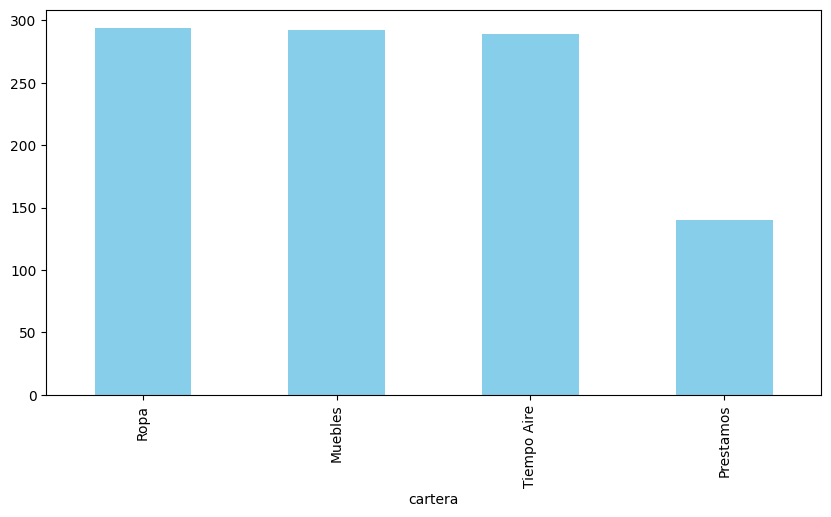

In [16]:
a= ventas_por_producto.sort_values(ascending=False)
a.plot(kind='bar', figsize=(10, 5), color='skyblue')

In [17]:
dia = df_ventas["dia_semana"]

In [18]:
dia.describe()


count          1015
unique            7
top       Saturday 
freq            146
Name: dia_semana, dtype: object

In [19]:
dia.value_counts()

dia_semana
Saturday     146
Monday       146
Wednesday    145
Friday       145
Tuesday      145
Sunday       144
Thursday     144
Name: count, dtype: int64

<Axes: xlabel='dia_semana'>

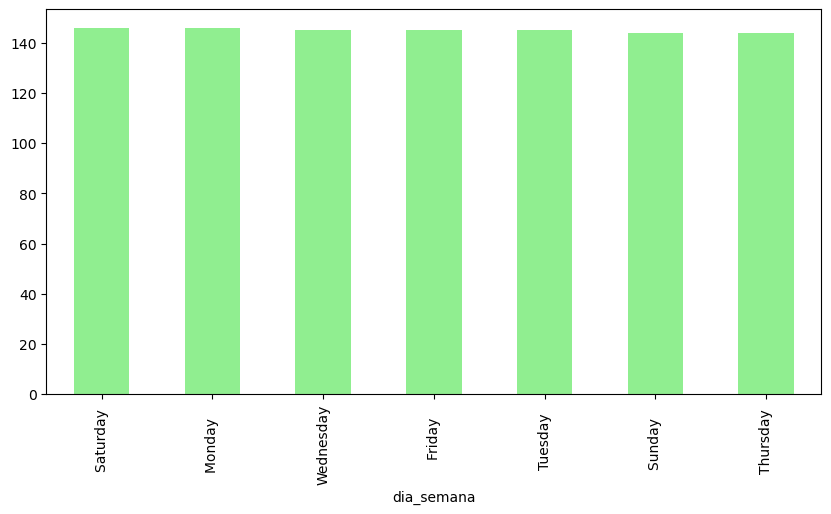

In [112]:
dia.value_counts().plot(kind='bar', figsize=(10, 5), color='lightgreen')

In [24]:
miercoles = df_ventas[df_ventas["dia_semana"] == "Wednesday"]
miercoles.head(-5)

,num_tie,dia_semana,tipocompra,cartera,promedio_venta
0,712,Wednesday,Contado,Ropa,17983.00
3,503,Wednesday,Credito,Ropa,8353.20
8,82,Wednesday,Credito,Tiempo Aire,520.75
17,86,Wednesday,Credito,Ropa,60693.60
18,951,Wednesday,Contado,Muebles,97440.68
...,...,...,...,...,...
951,758,Wednesday,Credito,Tiempo Aire,159.33
953,503,Wednesday,Contado,Ropa,13912.80
964,1389,Wednesday,Contado,Tiempo Aire,1227.20
969,1050,Wednesday,Credito,Tiempo Aire,130.25


In [114]:
miercoles_712 = miercoles[miercoles["num_tie"]== 712]

In [115]:
miercoles_712.head()

,num_tie,dia_semana,tipocompra,cartera,promedio_venta
0,712,Wednesday,Contado,Ropa,17983.00
110,712,Wednesday,Credito,Muebles,20014.87
356,712,Wednesday,Credito,Tiempo Aire,101.33
438,712,Wednesday,Credito,Ropa,14115.20
445,712,Wednesday,Contado,Muebles,2489.87


In [116]:
miercoles_712.describe()

,num_tie,promedio_venta
count,7.0,7.000000
mean,712.0,15171.895714
std,0.0,17400.255261
min,712.0,101.330000
25%,712.0,2013.835000
50%,712.0,14115.200000
75%,712.0,18998.935000
max,712.0,49961.200000


Text(0.5, 1.0, 'Ventas por tipo de compra en la tienda 712 los miércoles')

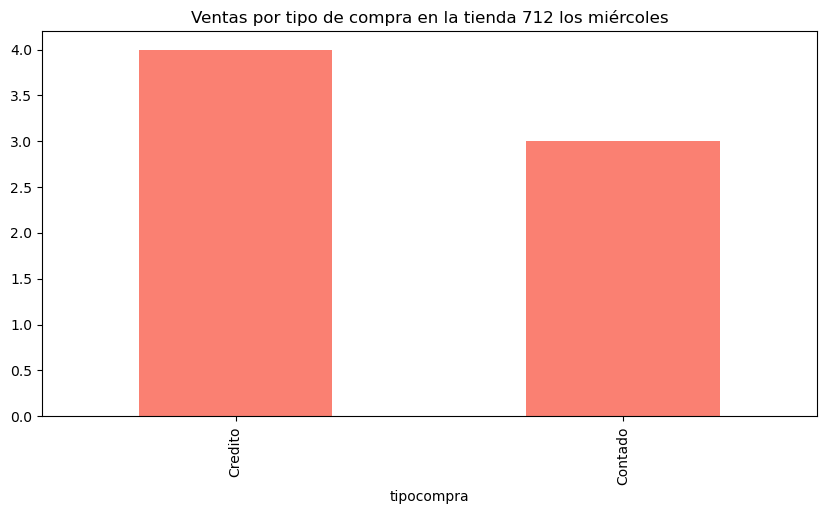

In [117]:
miercoles_712["tipocompra"].value_counts().plot(kind='bar', figsize=(10, 5), color='salmon')
plt.title("Ventas por tipo de compra en la tienda 712 los miércoles")

In [ ]:

Tipo_de_compra = df_ventas["tipocompra"]

In [119]:
Tipo_de_compra.value_counts() 

tipocompra
Credito    575
Contado    440
Name: count, dtype: int64

Text(0.5, 1.0, 'Cantidad de compras por tipo de compra')

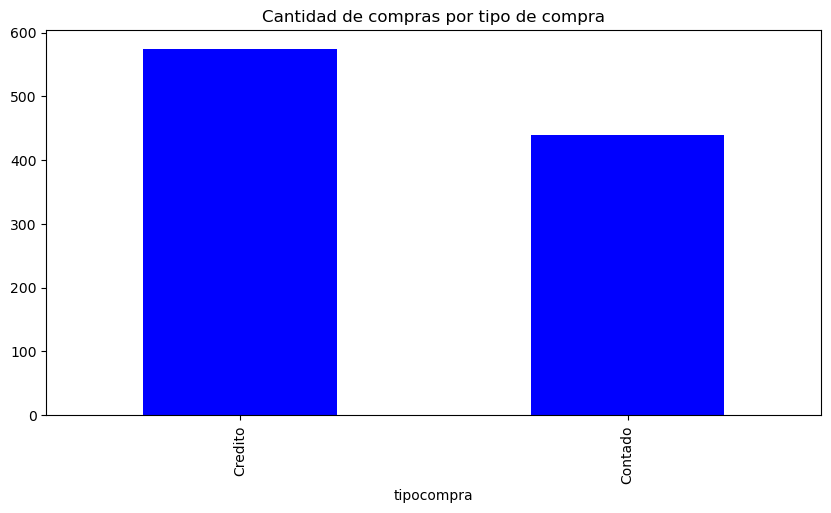

In [120]:
Tipo_de_compra.value_counts().plot(kind='bar', figsize=(10, 5), color='blue')
plt.title("Cantidad de compras por tipo de compra")


In [ ]:
tipo_de_compra_por_dia = df_ventas.groupby(['dia_semana', 'tipocompra']).size().unstack()

In [122]:
tipo_de_compra_por_dia  

tipocompra,Contado,Credito
dia_semana,,
Friday,63,82
Monday,63,83
Saturday,63,83
Sunday,63,81
Thursday,62,82
Tuesday,63,82
Wednesday,63,82


In [ ]:
tienda_numero_tipo_de_compra = df_ventas.groupby('num_tie')['tipocompra'].value_counts().unstack()

In [124]:
tienda_numero

tipocompra,Contado,Credito
num_tie,,
82,21,28
84,21,28
86,21,28
144,21,28
299,21,28
419,21,28
462,21,28
503,20,27
511,21,28


In [ ]:
tiendas = df_ventas["num_tie"]
tiendas.value_counts()

num_tie
712     49
6548    49
512     49
758     49
822     49
299     49
1159    49
954     49
84      49
86      49
511     49
419     49
7824    49
82      49
846     49
462     49
144     49
1389    49
1050    48
503     47
951     38
Name: count, dtype: int64

<Axes: xlabel='promedio_venta', ylabel='Count'>

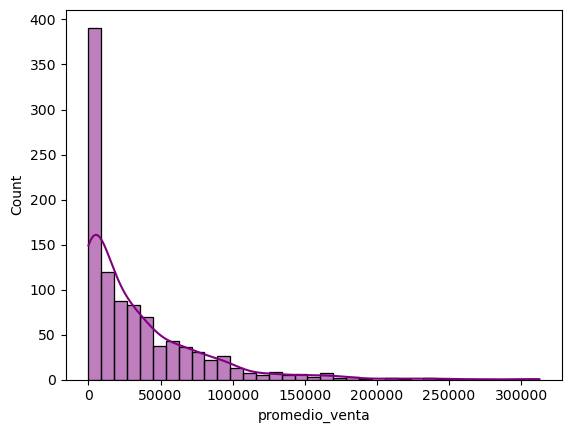

In [ ]:
sns.histplot(df_ventas["promedio_venta"], kde=True, color='purple')

<Axes: xlabel='promedio_venta', ylabel='Density'>

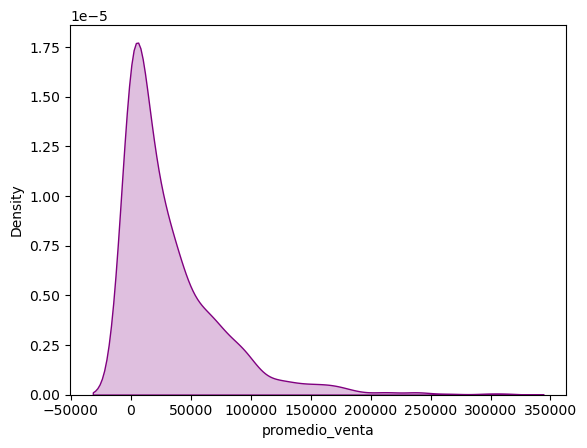

In [ ]:
sns.kdeplot(df_ventas["promedio_venta"], color='purple', fill=True)

In [ ]:
df_ventas.head()

,num_tie,dia_semana,tipocompra,cartera,promedio_venta
0,712,Wednesday,Contado,Ropa,17983.00
1,6548,Friday,Credito,Muebles,12930.51
2,144,Saturday,Contado,Tiempo Aire,1524.00
3,503,Wednesday,Credito,Ropa,8353.20
4,462,Friday,Contado,Tiempo Aire,1146.40


In [ ]:
dias_promedio_contado = df_ventas.groupby('dia_semana')['promedio_venta'].mean()


<Axes: xlabel='dia_semana'>

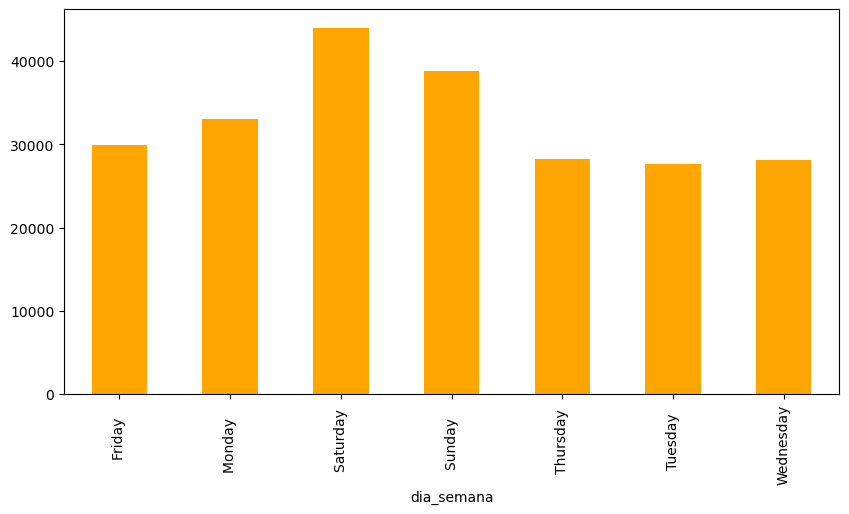

In [149]:
dias_promedio_contado.plot(kind='bar', figsize=(10, 5), color='orange')

In [ ]:
df_ventas.head()

,num_tie,dia_semana,tipocompra,cartera,promedio_venta
0,712,Wednesday,Contado,Ropa,17983.00
1,6548,Friday,Credito,Muebles,12930.51
2,144,Saturday,Contado,Tiempo Aire,1524.00
3,503,Wednesday,Credito,Ropa,8353.20
4,462,Friday,Contado,Tiempo Aire,1146.40


In [ ]:
dia_semana = df_ventas["dia_semana"].astype('category')
dia_semana 

0       Wednesday
1       Friday   
2       Saturday 
3       Wednesday
4       Friday   
          ...    
1010    Friday   
1011    Saturday 
1012    Saturday 
1013    Friday   
1014    Monday   
Name: dia_semana, Length: 1015, dtype: category
Categories (7, object): ['Friday   ', 'Monday   ', 'Saturday ', 'Sunday   ', 'Thursday ', 'Tuesday  ', 'Wednesday']

In [ ]:
print(df_ventas["dia_semana"].unique())
print(df_ventas["tipocompra"].unique())


['Wednesday' 'Friday   ' 'Saturday ' 'Sunday   ' 'Thursday ' 'Monday   '
 'Tuesday  ']
['Contado' 'Credito']


In [ ]:
df_ventas.head()

,num_tie,dia_semana,tipocompra,cartera,promedio_venta
0,712,Wednesday,Contado,Ropa,17983.00
1,6548,Friday,Credito,Muebles,12930.51
2,144,Saturday,Contado,Tiempo Aire,1524.00
3,503,Wednesday,Credito,Ropa,8353.20
4,462,Friday,Contado,Tiempo Aire,1146.40


In [ ]:
venta_miercoles_contado = df_ventas[(df_ventas["dia_semana"] == "Wednesday") & (df_ventas["tipocompra"] == "Contado")]


In [181]:
venta_miercoles_contado

,num_tie,dia_semana,tipocompra,cartera,promedio_venta
0,712,Wednesday,Contado,Ropa,17983.00
18,951,Wednesday,Contado,Muebles,97440.68
23,82,Wednesday,Contado,Tiempo Aire,2818.80
28,1159,Wednesday,Contado,Muebles,12191.02
67,951,Wednesday,Contado,Tiempo Aire,132.75
...,...,...,...,...,...
923,951,Wednesday,Contado,Ropa,26482.20
939,1050,Wednesday,Contado,Tiempo Aire,715.80
953,503,Wednesday,Contado,Ropa,13912.80
964,1389,Wednesday,Contado,Tiempo Aire,1227.20


In [177]:
venta_miercoles_contado.count()

num_tie           63
dia_semana        63
tipocompra        63
cartera           63
promedio_venta    63
dtype: int64

<Axes: title={'center': 'Ventas promedio de contado los miércoles por tienda'}, xlabel='num_tie'>

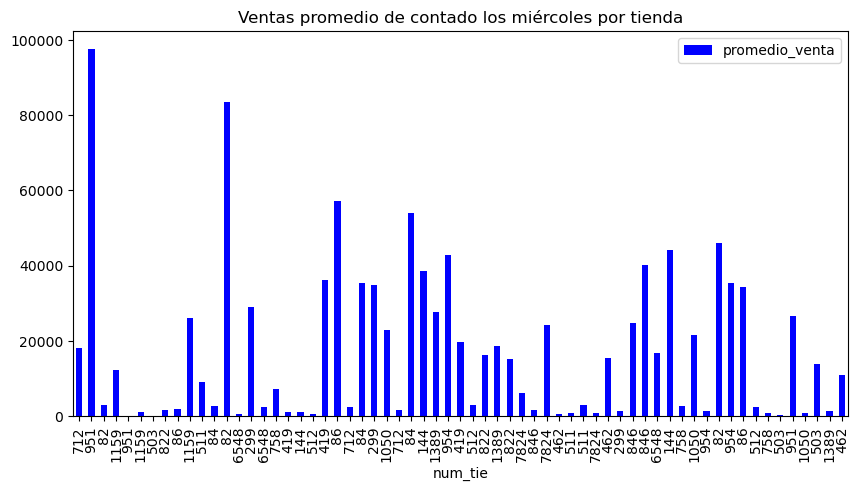

In [175]:
venta_miercoles_contado.plot(kind='bar', x='num_tie', y='promedio_venta', figsize=(10, 5), color='blue', title='Ventas promedio de contado los miércoles por tienda')

***EDA ABONOS***
